In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import winsound
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import random
import matplotlib.pyplot as plt

In [9]:
raw_df = pd.read_csv('data\M1_2019.csv')
df = raw_df[['TS', 'Close']]
df.head(2)

,TS,Close
0,2019-01-01 17:02,1.14598
1,2019-01-01 17:03,1.14607


In [4]:
new_list = df['Close'][0:1000]

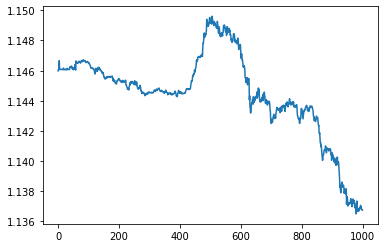

In [6]:
plt.plot(new_list)

In [7]:
diff_list = []
for i in range(0,999):
    diff = new_list[i+1] - new_list[i]
    diff_list.append(diff)

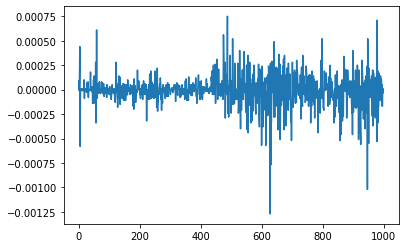

In [8]:
plt.plot(diff_list)

In [ ]:
roll_len = 61
diff_pip = 0.0001
min_bar = 5

In [ ]:
#df = df[:10000]
df = df.iloc[::min_bar]
print(f'DF len : {len(df)}')
print(df.head())
df = df.reset_index(drop=True)

In [ ]:
def new_df(roll_len):
    col_list = []

    for i in range(roll_len):
        col_list.append(i)
    
    col_list.append('TS')
    return(col_list)

In [ ]:
def reorder_df(df, roll_len):
    tot_list = []
    for i, val in tqdm(df.iterrows()):
        act_row = i+roll_len-1
        l = list(df['Close'][i:act_row+1])    
        if len(l) == roll_len:
            tot_list.append(l)
            l.append(df['TS'][act_row])
    df1=pd.DataFrame(tot_list,columns=col_list)
    return(df1)

In [ ]:
def get_year(row):
    year_val = dt.datetime.strptime(row['TS'], '%Y-%m-%d %H:%M').date().year
    return(year_val)

def get_month(row):
    month_val = dt.datetime.strptime(row['TS'], '%Y-%m-%d %H:%M').date().month
    return(month_val)

def get_day(row):
    day_val = dt.datetime.strptime(row['TS'], '%Y-%m-%d %H:%M').date().day
    return(day_val)   

def get_hour(row):
    hour_val = dt.datetime.strptime(row['TS'], '%Y-%m-%d %H:%M').time().hour
    return(hour_val)   

def get_min(row):
    min_val = dt.datetime.strptime(row['TS'], '%Y-%m-%d %H:%M').time().minute
    return(min_val)   

def get_dir(row):
    global diff_pip
    diff = row[roll_len-1] - row[roll_len-2]
    
    if diff > diff_pip:
        direction = 'increase'
    elif diff < -diff_pip:
        direction = 'decrease'
    else:
        direction = 'same'        
    
    return(direction)

def split_ts(df1, diff_pip):
    #df1['year'] = df1.apply(get_year, axis=1)
    df1['month'] = df1.apply(get_month, axis=1)
    df1['day'] = df1.apply(get_day, axis=1)
    df1['hour'] = df1.apply(get_hour, axis=1)
    df1['min'] = df1.apply(get_min, axis=1)
    df1['direction'] = df1.apply(get_dir, axis=1)
    
    cols = list(df1)

    cols.insert(0, cols.pop(cols.index('min')))
    cols.insert(0, cols.pop(cols.index('hour')))
    cols.insert(0, cols.pop(cols.index('day')))
    cols.insert(0, cols.pop(cols.index('month')))
    #cols.insert(0, cols.pop(cols.index('year')))

    df1 = df1[cols]

    del df1['TS']
    return(df1)

In [ ]:
col_list = new_df(roll_len)
rolled_df = reorder_df(df, roll_len)

In [ ]:
cols = list(rolled_df)
cols.insert(0, cols.pop(cols.index('TS')))
rolled_df = rolled_df[cols]

In [ ]:
rolled_df = split_ts(rolled_df, diff_pip)
rolled_df.head()

In [ ]:
print(rolled_df['direction'].value_counts())
print('--------------------------')
print(rolled_df['direction'].value_counts(normalize=True))

In [ ]:
del rolled_df[roll_len-1]
rolled_df.to_csv('data/rolled_df.csv', index = False)
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)